# Linear Models

## Ordinary Least Squares

Linear equation

$$\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_p x_p$$

Across the module, we designate the vector w=(w1,...wp) as coef_ and w0 as intercept_.

### Ordinary Least Squares

LinearRegression fits a linear model with coefficients  w=(w1,...wp)  to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. Mathematically it solves a problem of the form:

![linear](https://scikit-learn.org/stable/_images/sphx_glr_plot_ols_001.png)

LinearRegression will take in its fit method arrays X, y and will store the coefficients 
 of the linear model in its coef_ member:

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])
print(reg.coef_)
print(reg.intercept_)

[0.5 0.5]
1.1102230246251565e-16


In [7]:
predict = reg.predict([[50,50]])
predict

array([50.])

The coefficient estimates for Ordinary Least Squares rely on the independence of the features. When features are correlated and the columns of the design matrix 
 have an approximately linear dependence, the design matrix becomes close to singular and as a result, the least-squares estimate becomes highly sensitive to random errors in the observed target, producing a large variance. This situation of multicollinearity can arise, for example, when data are collected without an experimental design.

### Linear Regression Example

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

[233.  91. 111. 152. 120.  67. 310.  94. 183.  66. 173.  72.  49.  64.
  48. 178. 104. 132. 220.  57.] [225.9732401  115.74763374 163.27610621 114.73638965 120.80385422
 158.21988574 236.08568105 121.81509832  99.56772822 123.83758651
 204.73711411  96.53399594 154.17490936 130.91629517  83.3878227
 171.36605897 137.99500384 137.99500384 189.56845268  84.3990668 ]
Coefficients:  [938.23786125]
Intercept:  152.91886182616113
Mean squared error: 2548.07
Coefficient of determination: 0.47


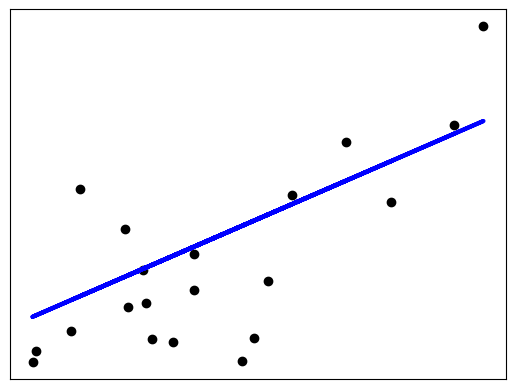

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

print(diabetes_y_test, diabetes_y_pred)

# The coefficients
print("Coefficients: ", regr.coef_)
# The intercept
print("Intercept: ", regr.intercept_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

##############
# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

## r2_score

### Classwork

#### load new data "fetch_california_housing"

               MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc       1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge    -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms     0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms   -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population   0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup     0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude    -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude   -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   
MedHouseVal  0.688075  0.105623  0.151948  -0.046701   -0.024650 -0.023737   

             Latitude  Longitude  MedHouseVal  
MedInc      -0.079809  -0.015176     0.688075  
HouseAge     0.011173  -0.108197     0.105623  
AveRooms     0.106389  -0.027540     0.151948  
AveBedrms    0.069721   0.0

<ipython-input-9-c35fa105eef6>:75: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pred_data = pred_data.append(new_data, ignore_index=True)


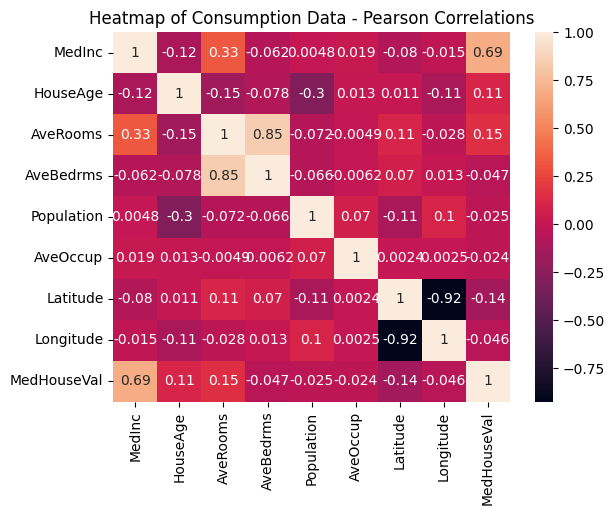

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing
dataset = sklearn.datasets.fetch_california_housing()

# check data
# print(dataset)
# print("feature names", dataset.feature_names)
# print("target name", dataset.target_names)
# print(dataset.DESCR)
# print(len(dataset.data))

# put them to pd
data = pd.DataFrame(dataset.data, columns= dataset.feature_names)
data['MedHouseVal'] = dataset.target
# print(data.head())

# check correlation
import seaborn as sns 
correlations = data.corr()
print(correlations)
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations')

# we just use MedInc and AveRooms
X = pd.DataFrame(np.c_[data['MedInc'], data['AveRooms']], columns = ['MedInc', 'AveRooms'])
y = data['MedHouseVal']
# print(X)
# print(len(X))
# print(y)
# print(len(y))

# split train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)
# print(X_train, X_test)
# print(y_train, y_test)

# create LinearRegression model
lr = LinearRegression()

# train model
lr.fit(X_train, y_train)

# predict from test data
y_pred = lr.predict(X_test)

# The coefficients
print("Coefficients: ", lr.coef_)

# Print y-intercept
print("y-intercept:", lr.intercept_)

# The mean squared error
print("Mean squared error: {:.2f}".format(mean_squared_error(y_test, y_pred)))

# # The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: {:.2f}".format(r2_score(y_test, y_pred)))

#### pred data
# check X data type
print(type(X))
print(X.head())

# based on X to create an empty df
pred_data = X.copy()
pred_data = pred_data.iloc[0:0]
# print(pred_data.dtypes)

# create a df by dict
new_data = {'MedInc':3., 'AveRooms':4.}
pred_data = pred_data.append(new_data, ignore_index=True)
print(pred_data)
result = lr.predict(pred_data)
print(result)
print()

# create a df by multiple data
new_data1 = pd.DataFrame([
    [1., 2.],
    [3., 4.],
], columns=['MedInc','AveRooms'])
new_data2 = pd.DataFrame([
    [5., 5.],
    [6., 6.],
], columns=['MedInc','AveRooms'])
pred_data = pd.concat([new_data1, new_data2], ignore_index=True)
print(pred_data)
result = lr.predict(pred_data)
print(result)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.datasets import fetch_california_housing
dataset = sklearn.datasets.fetch_california_housing()

#check data
print(dataset)
print("feature names", dataset.feature_names)
print("target name", dataset.target_names)
print(dataset.DESCR)
print(len(dataset.data))



{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

r2_score (coefficient of determination) regression score function.

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). In the general case when the true y is non-constant, a constant model that always predicts the average y disregarding the input features would get a R2 score of 0.0.

In the particular case when y_true is constant, the R2 score is not finite: it is either NaN (perfect predictions) or -Inf (imperfect predictions). To prevent such non-finite numbers to pollute higher-level experiments such as a grid search cross-validation, by default these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect predictions) respectively. You can set force_finite to False to prevent this fix from happening.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_true = [1, 2, 3]
y_pred = [1, 2, 3]
r2_score(y_true, y_pred)

1.0

In [ ]:
y_true = [-21, -32, -43]
y_pred = [-21, -32, -43]
r2_score(y_true, y_pred)

0.6760259179265659

In [ ]:
y_true = [1, 2, 3]
y_pred = [2, 2, 2]
r2_score(y_true, y_pred)

0.0

In [ ]:
y_true = [1, 2, 3]
y_pred = [3, 2, 1]
r2_score(y_true, y_pred)

-3.0

In [ ]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
r2_score(y_true, y_pred)

0.9486081370449679

In [ ]:
y_true = [[0.5, 1], [-1, 1], [7, -6]]
y_pred = [[0, 2], [-1, 2], [8, -5]]
r2_score(y_true, y_pred, multioutput='variance_weighted')

0.9382566585956417

In [ ]:
y_true = [1, 2, 3]
y_pred = [3, 2, 1]
r2_score(y_true, y_pred)

-3.0

In [ ]:
r2_score(y_true, y_pred, force_finite=False)

-3.0

In [ ]:
y_true = [-2, -2, -2]
y_pred = [-2, -2, -2.00001]
r2_score(y_true, y_pred)

0.0

In [ ]:
r2_score(y_true, y_pred, force_finite=False)

/Users/raymondtsang/Library/jupyterlab-desktop/jlab_server/lib/python3.8/site-packages/sklearn/metrics/_regression.py:624: RuntimeWarning: divide by zero encountered in divide
  output_scores = 1 - (numerator / denominator)


-inf

## Random data

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
X, y = datasets.make_regression(n_samples=200, n_features=1, n_targets=1, noise=10)

In [ ]:
X[:5]

array([[-0.98371308],
       [ 1.19842643],
       [-0.75764978],
       [-0.48665993],
       [-0.5992639 ]])

In [ ]:
y[:5]

array([-10.21126476,  34.55052118, -14.66686568,  -9.13667336,
       -25.76915742])

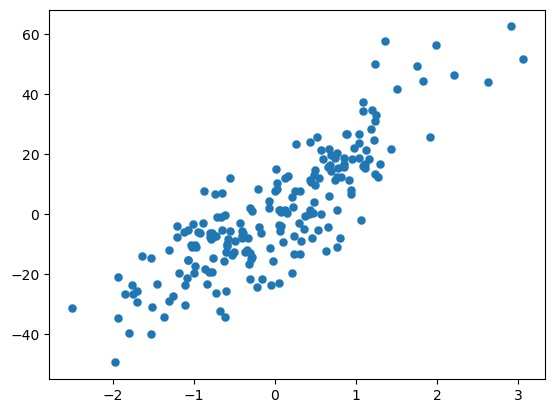

In [ ]:
plt.scatter(X, y, linewidths=0.1)
plt.show()

In [ ]:
# create LinearRegression model
lr = LinearRegression()

# train model
lr.fit(X, y)

# predict from test data
y_pred = lr.predict(X)

# The coefficients
print("Coefficients: ", lr.coef_)

# Print y-intercept
print("y-intercept:", lr.intercept_)

Coefficients:  [17.56824875]
y-intercept: 0.5701559476392466


In [ ]:
predict = lr.predict(X)
# print(predict)
print(len(predict))
print(type(predict))

200
<class 'numpy.ndarray'>


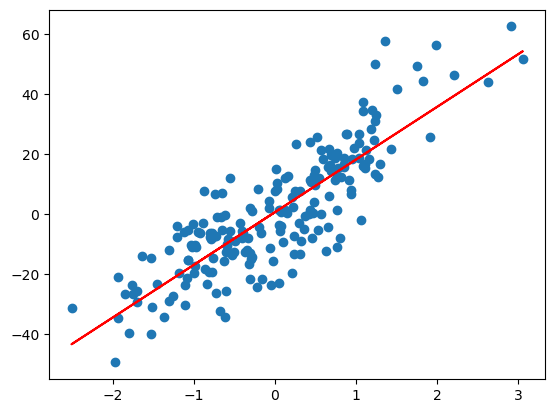

In [ ]:
plt.plot(X, predict, c="red")
plt.scatter(X, y)
plt.show()

## Single variable Linear Regression

> Use student_scores.csv for data
> You can download from https://drive.google.com/open?id=1oakZCv7g3mlmCSdv9J8kdSaqO5_6dIOw

(25, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes
None
           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000
[1.36320694]
Coefficients:  [[10.00702158]]
Mean squared error: 23.10
Coefficient of determination: 0.93
Your score will be [[96.42991191]]


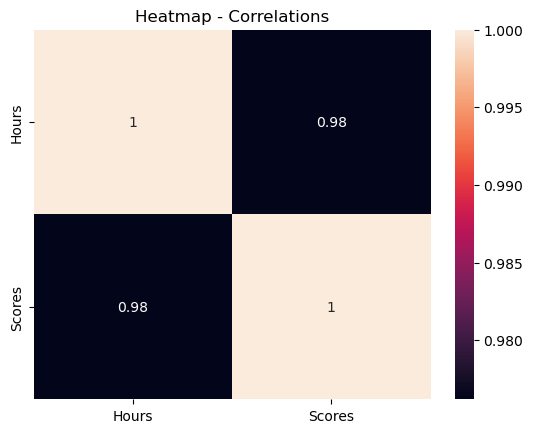

In [ ]:
# import numpy
import numpy as np

# import matplotlab
import matplotlib.pyplot as plt

# import r2_score from sklearn
from sklearn.metrics import r2_score

path_to_file = 'student_scores.csv'
df = pd.read_csv(path_to_file)

print(df.shape)
print(df.info())
print(df.describe())
print(df.head())
df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages');

correlations = df.corr()
print(correlations)
sns.heatmap(correlations, annot=True).set(title='Heatmap - Correlations');

X = df['Hours'].values.reshape(-1, 1)
y = df['Scores'].values.reshape(-1, 1)

#############
# import train test split from sklearn
from sklearn.model_selection import train_test_split

# import mean squared error, r2 score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# split the data by 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# import linear regression from linear model
from sklearn.linear_model import LinearRegression

# create Linear Regression
lr = LinearRegression()

# train a model
y_pred = lr.fit(X_train, y_train).predict(X_test)

# interception
print("Interception:", lr.intercept_)

# The coefficients
print("Coefficients: ", lr.coef_)

# The mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of determination: {r2:.2f}")


### predict
score = lr.predict([[9.5]])
print('Your score will be', score)

##########
# Plot graph
# fig, ax = plt.subplots()
# ax.plot(X_train, y_train, linewidth=0, marker=".")

# low_x, high_x = ax.get_xlim()
# low_y, high_y = ax.get_ylim()
# low = max(low_x, low_y)
# high = min(high_x, high_y)
# ax.plot([low, high], [low, high], ls="--", c=".3", alpha=0.5)
# ax.set_xlabel("OLS regression coefficients", fontweight="bold")
# ax.set_ylabel("NNLS regression coefficients", fontweight="bold")

## Multiple Linear Regression

> You can download from
> https://www.kaggle.com/datasets/harinir/petrol-consumption

In [ ]:
path_to_file = 'petrol_consumption.csv'
df = pd.read_csv(path_to_file)
df.head()
print(df.shape)
print(df.info())
# print(df.describe())
print(df.describe().round(2).T)
print(df.head())

(48, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Petrol_tax                    48 non-null     float64
 1   Average_income                48 non-null     int64  
 2   Paved_Highways                48 non-null     int64  
 3   Population_Driver_licence(%)  48 non-null     float64
 4   Petrol_Consumption            48 non-null     int64  
dtypes: float64(2), int64(3)
memory usage: 2.0 KB
None
                              count     mean      std      min      25%  \
Petrol_tax                     48.0     7.67     0.95     5.00     7.00   
Average_income                 48.0  4241.83   573.62  3063.00  3739.00   
Paved_Highways                 48.0  5565.42  3491.51   431.00  3110.25   
Population_Driver_licence(%)   48.0     0.57     0.06     0.45     0.53   
Petrol_Consumption             48.0   576.77   

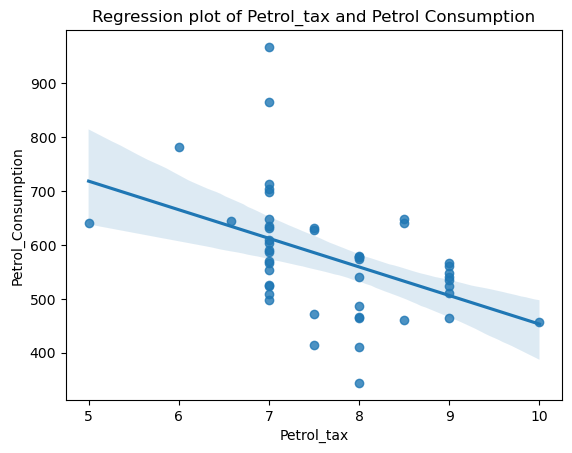

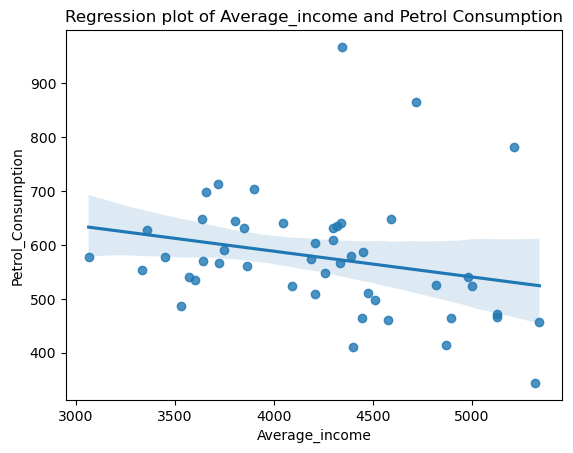

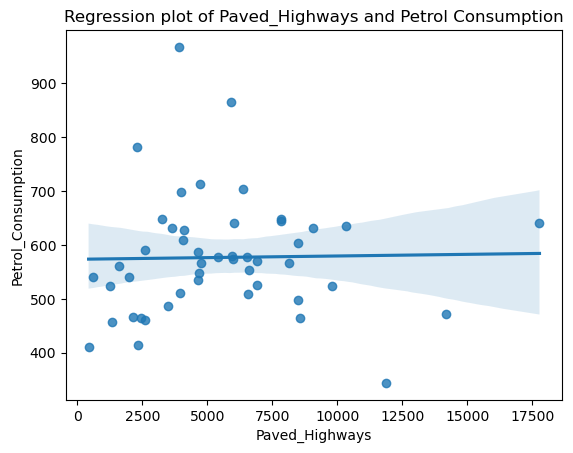

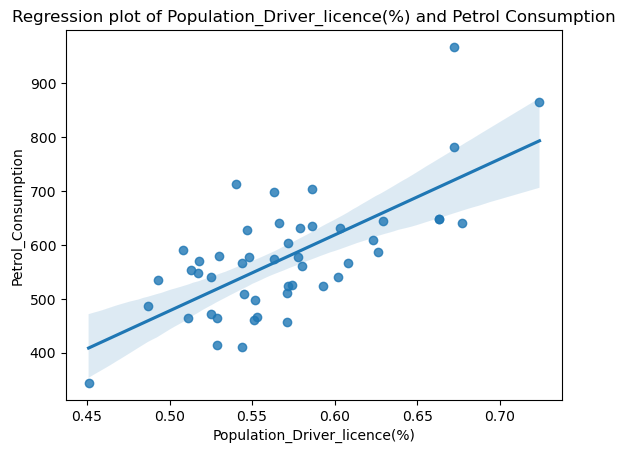

In [ ]:
import seaborn as sns

variables = ['Petrol_tax', 'Average_income', 'Paved_Highways','Population_Driver_licence(%)']

for var in variables:
    plt.figure() # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='Petrol_Consumption', data=df).set(title=f'Regression plot of {var} and Petrol Consumption');

                              Petrol_tax  Average_income  Paved_Highways  \
Petrol_tax                      1.000000        0.012665       -0.522130   
Average_income                  0.012665        1.000000        0.050163   
Paved_Highways                 -0.522130        0.050163        1.000000   
Population_Driver_licence(%)   -0.288037        0.157070       -0.064129   
Petrol_Consumption             -0.451280       -0.244862        0.019042   

                              Population_Driver_licence(%)  Petrol_Consumption  
Petrol_tax                                       -0.288037           -0.451280  
Average_income                                    0.157070           -0.244862  
Paved_Highways                                   -0.064129            0.019042  
Population_Driver_licence(%)                      1.000000            0.698965  
Petrol_Consumption                                0.698965            1.000000  


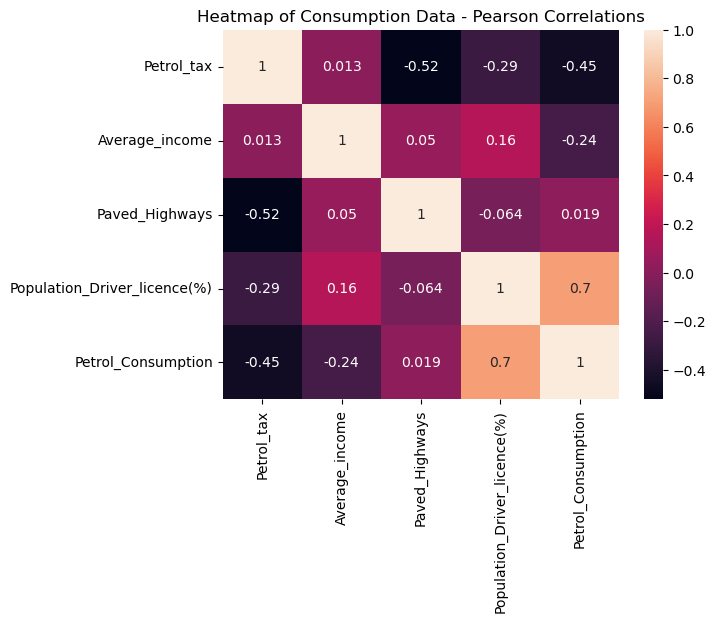

In [ ]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations, annot=True).set(title='Heatmap of Consumption Data - Pearson Correlations');

In [ ]:
y = df['Petrol_Consumption']
X = df[['Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_tax']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=2)
X.shape

(48, 4)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# interception
print("Interception:", lr.intercept_)

# The coefficients
print("Coefficients: ", lr.coef_)

coefficients_df = pd.DataFrame(data = lr.coef_, 
                              index = X.columns, 
                              columns = ['Coefficient value'])
print(coefficients_df)

# # The mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

# # The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, y_pred)
print(f"Coefficient of determination: {r2:.2f}")

### predict
score = lr.score(X_test, y_test)
print('Your score will be', score)

### predict
score = lr.score(X_train, y_train)
print('Your score will be', score)

Interception: 396.5890868033547
Coefficients:  [-6.57785154e-02 -2.43348926e-03  1.43161142e+03 -4.41461642e+01]
                              Coefficient value
Average_income                        -0.065779
Paved_Highways                        -0.002433
Population_Driver_licence(%)        1431.611420
Petrol_tax                           -44.146164
Mean absolute error: 56.62
Mean squared error: 4161.76
Root mean squared error: 64.51
Coefficient of determination: -1.16
Your score will be -1.1612673269625136
Your score will be 0.7275188986304031


In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

    Actual   Predicted
23     547  447.928464
12     525  575.591704
42     632  659.134274
16     603  609.079108
35     644  737.437039
43     591  562.130158
46     610  686.939414
13     508  575.051588
14     566  653.178314
0      541  511.165952


## end